<a href="https://colab.research.google.com/github/pxs1990/DeepLearning/blob/main/ANN_Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#**Import Dataset**

In [ ]:
path = '/content/Churn_Modelling.csv'
df = pd.read_csv(path)

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


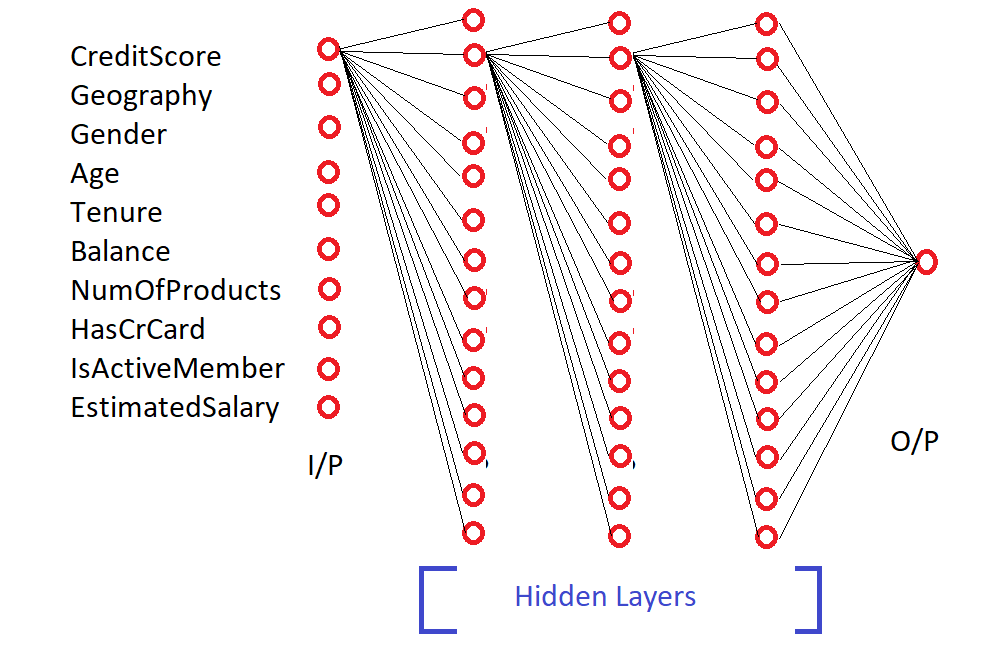

In [ ]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [ ]:
X = df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values

In [ ]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

#**Label Encoding the "Gender" column**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

#**OneHotEncoder on "Geography" column**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

#**Splitting the dataset into the Training set and Test set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

#**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#**Artificial Neural Network**

#**Building ANN**

#**Initialization of ANN**

In [ ]:
import tensorflow as tf
ann = tf.keras.models.Sequential()

#**Adding First Hidden Layer**

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

#**Adding Second Hidden Layer**

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

#**Third Hidden Layer**

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(X_train, y_train, batch_size=32, epochs=35)

Epoch 1/35
282/282 [==============================] - 2s 3ms/step - loss: 0.5119 - accuracy: 0.7964
Epoch 2/35
282/282 [==============================] - 1s 3ms/step - loss: 0.4611 - accuracy: 0.7966
Epoch 3/35
282/282 [==============================] - 1s 3ms/step - loss: 0.4419 - accuracy: 0.7963
Epoch 4/35
282/282 [==============================] - 1s 3ms/step - loss: 0.4312 - accuracy: 0.7990
Epoch 5/35
282/282 [==============================] - 1s 3ms/step - loss: 0.4248 - accuracy: 0.8151
Epoch 6/35
282/282 [==============================] - 1s 3ms/step - loss: 0.4198 - accuracy: 0.8233
Epoch 7/35
282/282 [==============================] - 1s 3ms/step - loss: 0.4157 - accuracy: 0.8269
Epoch 8/35
282/282 [==============================] - 1s 4ms/step - loss: 0.4122 - accuracy: 0.8311
Epoch 9/35
282/282 [==============================] - 1s 4ms/step - loss: 0.4089 - accuracy: 0.8324
Epoch 10/35
282/282 [==============================] - 1s 3ms/step - loss: 0.4056 - accuracy: 0.8339

In [ ]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) >= 0.5)

1/1 [==============================] - 0s 83ms/step
[[False]]


In [ ]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 160000, 2, 1, 1, 150000]])) >= 0.5)

1/1 [==============================] - 0s 18ms/step
[[False]]


In [ ]:
print(ann.predict(sc.transform([[0, 1, 0, 600, 1, 40, 3, 160000, 2, 1, 1, 150000]])) >= 0.5)

1/1 [==============================] - 0s 19ms/step
[[False]]


In [ ]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 24, 3, 60000, 2, 1, 1, 50000]])) >= 0.5)

1/1 [==============================] - 0s 17ms/step
[[False]]


In [ ]:
# 653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
print(ann.predict(sc.transform([[1, 0, 0, 653, 1, 58, 3, 132602.88, 1, 1, 0, 5097.67]])) > 0.5)

1/1 [==============================] - 0s 18ms/step
[[ True]]


In [ ]:
# 510,Spain,Female,38,4,0,1,1,0,118913.53,1
print(ann.predict(sc.transform([[0, 1, 0, 510, 0, 38, 4, 0, 1, 1, 0, 118913.53]])) >= 0.5)

1/1 [==============================] - 0s 26ms/step
[[False]]


In [ ]:
# 591,Spain,Female,39,3,0,3,1,0,140469.38,1
print(ann.predict(sc.transform([[0, 0, 1, 591, 0, 39, 3, 0, 3, 1, 0, 140469.38]])) >= 0.5)

1/1 [==============================] - 0s 17ms/step
[[ True]]


In [ ]:
# 829,Germany,Female,27,9,112045.67,1,1,1,119708.21,1
print(ann.predict(sc.transform([[1, 0, 0, 829, 0, 27, 9, 112045.67, 1, 1, 1, 119708.21]])) >= 0.5)

1/1 [==============================] - 0s 17ms/step
[[False]]


In [ ]:
# 772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
print(ann.predict(sc.transform([[0, 1, 0, 772, 1, 42, 3, 75075.31, 2, 1, 0, 92888.52]])) >= 0.5)

1/1 [==============================] - 0s 17ms/step
[[False]]


In [ ]:
# 709,France,Female,36,7,0,1,0,1,42085.58,1
print(ann.predict(sc.transform([[1, 0, 0, 709, 0, 36,7,0,1,0,1,42085.58]])) >= 0.5)

1/1 [==============================] - 0s 17ms/step
[[False]]


In [ ]:
print(ann.predict(sc.transform([[1, 0, 1, 850, 0, 42, 1, 300000, 1, 1, 1, 301348]])) >= 0.5)

1/1 [==============================] - 0s 17ms/step
[[False]]


In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

32/32 [==============================] - 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[748  46]
 [ 94 112]]


0.86